<a href="https://colab.research.google.com/github/KarinaJoanna/Practica2_2_VA/blob/main/Practica_Vision_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

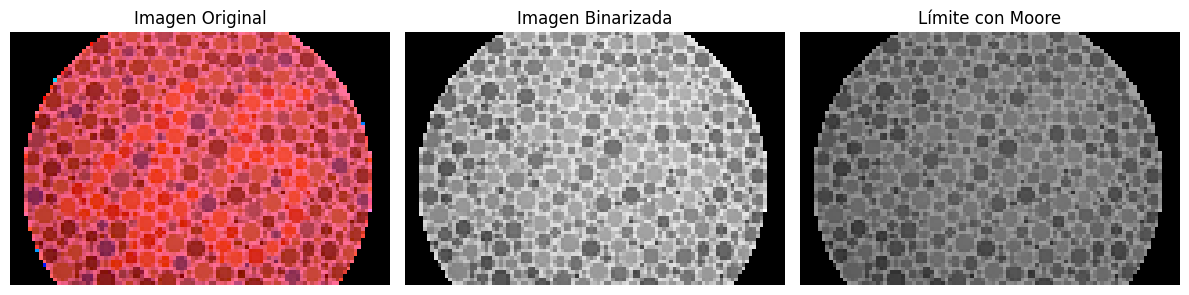

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_contour_moore(imagen_binarizada):
    contornos = []

    # Encuentra el primer píxel activo (valor 255) en la imagen binarizada
    inicio = None
    for y in range(imagen_binarizada.shape[0]):
        for x in range(imagen_binarizada.shape[1]):
            if imagen_binarizada[y, x] == 255:
                inicio = (x, y)
                contornos.append(inicio)
                break
        if inicio:
            break

    if not inicio:
        return contornos

    # Definir los desplazamientos en los 8 vecinos (Moore)
    desplazamientos = [(-1, -1), (0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0)]

    # Recorre el contorno siguiendo el algoritmo de Moore
    actual = inicio
    while True:
        siguiente_encontrado = False
        for desplazamiento in desplazamientos:
            siguiente = (actual[0] + desplazamiento[0], actual[1] + desplazamiento[1])
            if (0 <= siguiente[0] < imagen_binarizada.shape[1] and
                    0 <= siguiente[1] < imagen_binarizada.shape[0] and
                    imagen_binarizada[siguiente[1], siguiente[0]] == 255):
                contornos.append(siguiente)
                actual = siguiente
                siguiente_encontrado = True
                if actual == inicio:
                    break
        if not siguiente_encontrado or actual == inicio:
            break

    return contornos

# Ejemplo de uso:
imagen = cv2.imread('ishihara-18.png', cv2.IMREAD_COLOR)
imagen_binarizada = cv2.imread('ishihara-18.png', cv2.IMREAD_GRAYSCALE)

contornos = find_contour_moore(imagen_binarizada)

# Crea una copia de la imagen binarizada en color
imagen_con_contornos = cv2.cvtColor(imagen_binarizada, cv2.COLOR_GRAY2BGR)

# Dibujar los contornos en la copia de la imagen binarizada
for punto in contornos:
    x, y = punto
    imagen_con_contornos[y, x] = [0, 255, 255]

# Crear un subplot
plt.figure(figsize=(12, 4))

# Mostrar la imagen original
plt.subplot(131)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

# Mostrar la imagen binarizada
plt.subplot(132)
plt.imshow(imagen_binarizada, cmap='gray')
plt.title('Imagen Binarizada')
plt.axis('off')

# Mostrar la imagen binarizada con el contorno en rojo
plt.subplot(133)
plt.imshow(cv2.cvtColor(imagen_con_contornos, cv2.COLOR_BGR2RGB))
plt.title('Límite con Moore')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def freeman_contour(image, connectivity=8):
    if connectivity != 4 and connectivity != 8:
        raise ValueError("La conectividad debe ser 4 o 8")

    def find_next(p, d):
        dx, dy = d
        return p[0] + dx, p[1] + dy

    def is_valid(p, image_shape):
        return 0 <= p[0] < image_shape[1] and 0 <= p[1] < image_shape[0]

    contour = []
    freeman_code = []

    if connectivity == 4:
        codigo_freeman = [0, 1, 2, 3]
        directions = [(1, 0), (0, -1), (-1, 0), (0, 1)]
    else:
        codigo_freeman = [0, 7, 6, 5, 4, 3, 2, 1]
        directions = [(1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1)]

    image_shape = image.shape
    start = None
    for y in range(image_shape[0]):
        for x in range(image_shape[1]):
            if image[y, x] == 255:
                start = (x, y)
                break
        if start is not None:
            break

    if start is None:
        return [], []

    current = start
    current_dir = 0

    while True:
        next_dir = (current_dir + 1) % len(codigo_freeman)
        found = False

        for _ in range(len(codigo_freeman)):
            next_point = find_next(current, directions[next_dir])

            if is_valid(next_point, image_shape) and image[next_point[1], next_point[0]] == 255:
                contour.append(current)
                freeman_code.append(codigo_freeman[next_dir])
                current = next_point
                current_dir = (next_dir + len(codigo_freeman) // 2) % len(codigo_freeman)
                found = True
                break

            next_dir = (next_dir + 1) % len(codigo_freeman)

        if not found or current == start:
            break

    return contour, freeman_code

def generate_contour_and_arrows(image_path, connectivity=8):
    # Cargar la imagen con OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Aplicar el algoritmo de Freeman al contorno de la imagen
    contour, freeman_code = freeman_contour(image, connectivity)
    rc = freeman_code

    # Crear una imagen en blanco para mostrar el contorno
    contour_image = np.zeros_like(image)

    # Dibujar el contorno en la imagen en blanco
    for x, y in contour:
        contour_image[y, x] = 255

    # Crear una figura de Matplotlib
    plt.figure(figsize=(12, 6))

    # Mostrar la imagen con el contorno
    plt.subplot(121)
    plt.imshow(contour_image, cmap='gray')
    plt.title('Contorno de la Imagen')
    plt.axis('off')

    # Crear un eje para mostrar las flechas
    ax = plt.subplot(122)

    for (x, y), code in zip(contour, freeman_code):
        dx, dy = (0, 0)

        if connectivity == 8:
            if code == 0:
                dx, dy = (1, 0)
            elif code == 1:
                dx, dy = (1, 1)
            elif code == 2:
                dx, dy = (0, 1)
            elif code == 3:
                dx, dy = (-1, 1)
            elif code == 4:
                dx, dy = (-1, 0)
            elif code == 5:
                dx, dy = (-1, -1)
            elif code == 6:
                dx, dy = (0, -1)
            elif code == 7:
                dx, dy = (1, -1)
        else:
            if code == 0:
                dx, dy = (1, 0)
            elif code == 1:
                dx, dy = (0, -1)
            elif code == 2:
                dx, dy = (-1, 0)
            elif code == 3:
                dx, dy = (0, 1)

        # Generar un color aleatorio para la flecha
        color = (random.random(), random.random(), random.random())

        # Dibujar la flecha
        ax.quiver(x, y, dx, dy, angles='xy', scale_units='xy', scale=1, color=color, headwidth=3, headlength=4)

    ax.set_aspect('equal', adjustable='box')
    plt.title(f'Flechas del Código de Freeman {connectivity}')
    plt.axis('off')
    print(freeman_code)
    plt.tight_layout()
    plt.show()

#--------------------------------------------------------------------
image_path = 'circulo.jpeg'
imagen1 = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
plt.imshow(imagen1, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()

connectivity = 8  # Puedes cambiar la conectividad a 4 si lo deseas
generate_contour_and_arrows(image_path, connectivity)

#--------------------------------------------------------------------
image_path = 'circulo2.jpeg'
imagen1 = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
plt.imshow(imagen1, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()

connectivity = 8  # Puedes cambiar la conectividad a 4 si lo deseas
generate_contour_and_arrows(image_path, connectivity)

#--------------------------------------------------------------------
image_path = 'circulo.jpeg'
imagen1 = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
plt.imshow(imagen1, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()

connectivity = 4  # Puedes cambiar la conectividad a 4 si lo deseas
generate_contour_and_arrows(image_path, connectivity)

#--------------------------------------------------------------------
image_path = 'circulo2.jpeg'
imagen1 = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
plt.imshow(imagen1, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()

connectivity = 4  # Puedes cambiar la conectividad a 4 si lo deseas
generate_contour_and_arrows(image_path, connectivity)

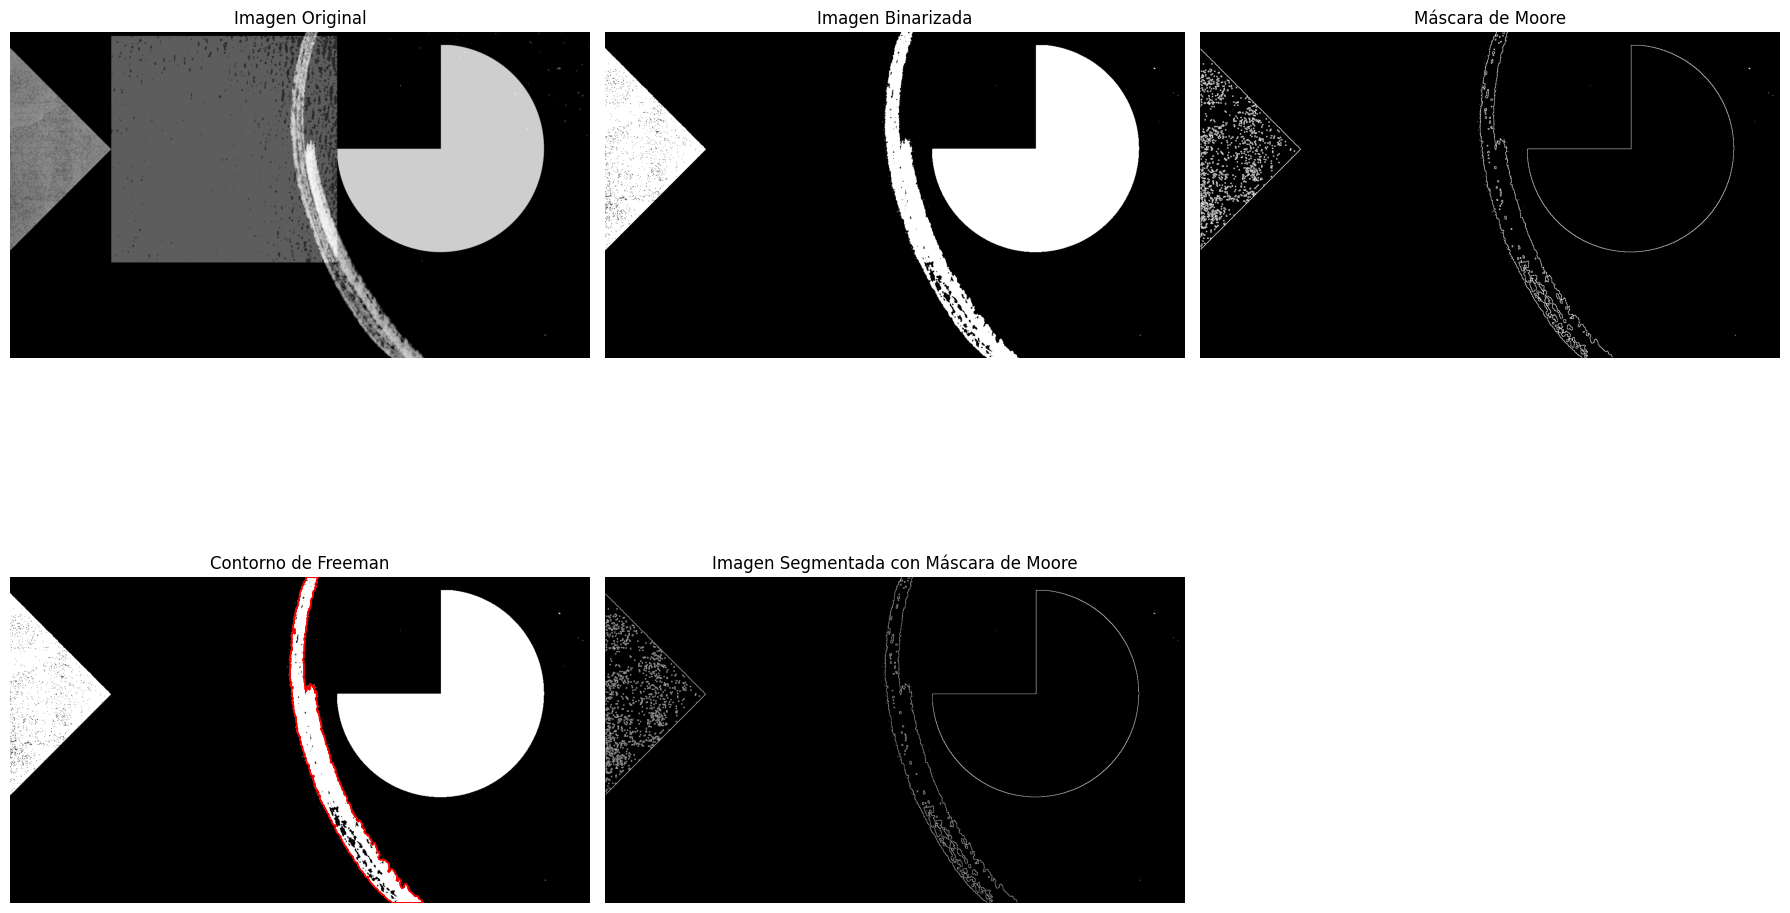

Cadenas obtenidas por el algoritmo de Freeman:
Cadena original: [2, 3, 1, 3, 2, 3, 2, 3, 2, 2, 3, 3, 4, 3, 2, 1, 2, 3, 2, 3, 3, 3, 2, 3, 2, 1, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 1, 3, 3, 4, 1, 3, 2, 3, 1, 2, 3, 3, 1, 3, 2, 2, 1, 2, 2, 3, 3, 4, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 1, 2, 3, 1, 2, 3, 5, 1, 1, 0, 0, 0, 1, 2, 3, 2, 2, 2, 2, 1, 2, 3, 4, 5, 5, 6, 5, 6, 6, 2, 2, 2, 3, 3, 3, 1, 2, 2, 2, 2, 3, 5, 1, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 3, 0, 1, 2, 2, 2, 3, 3, 1, 2, 2, 3, 1, 2, 2, 1, 1, 3, 4, 1, 3, 2, 1, 3, 4, 2, 3, 2, 1, 2, 3, 2, 2, 2, 3, 2, 1, 3, 2, 3, 0, 1, 2, 2, 2, 3, 4, 5, 1, 1, 1, 2, 2, 3, 4, 1, 2, 3, 2, 0, 1, 2, 2, 3, 2, 2, 1, 2, 3, 5, 1, 2, 2, 2, 2, 2, 3, 2, 1, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 3, 2, 1, 2, 2, 0, 1, 2, 3, 4, 1, 2, 2, 2, 2, 3, 1, 1, 0, 7, 1, 2, 2, 3, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 3, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def minimum_magnitude(chain_code):
    # minima magnitud
    N = len(chain_code)
    norm_chain_code = np.copy(chain_code)
    circ_chain_code = np.copy(chain_code)
    minimum_int = int(''.join([str(c) for c in chain_code]))
    for _ in range(N):
        first_element = circ_chain_code[0]
        circ_chain_code[:-1] = circ_chain_code[1:]
        circ_chain_code[-1] = first_element
        test_int = int(''.join([str(c) for c in circ_chain_code]))
        if minimum_int > test_int:
            minimum_int = test_int
            norm_chain_code = np.copy(circ_chain_code)
    return list(norm_chain_code)


def first_difference(chain_code, connectivity):
    # Primera diferencia
    fdt_chain_code = []
    N = len(chain_code)
    for i in range(N-1):
        fdt_chain_code.append(
            np.mod(chain_code[i+1] - chain_code[i], connectivity))
    fdt_chain_code.append(np.mod(chain_code[0] - chain_code[-1], connectivity))
    return fdt_chain_code

# Función para obtener la máscara de Moore
def moore_boundary(image):
    height, width = image.shape
    boundary_image = np.zeros((height, width), dtype=np.uint8)  # Modificar el tipo de datos a np.uint8

    def is_boundary_pixel(x, y):
        if image[x][y] == 0:
            return False
        for i in range(x - 1, x + 2):
            for j in range(y - 1, y + 2):
                if image[i][j] == 0:
                    return True
        return False

    for x in range(1, height - 1):
        for y in range(1, width - 1):
            if is_boundary_pixel(x, y):
                boundary_image[x][y] = 255  # Usar 255 en lugar de 1 para que sea blanco en lugar de 1

    return boundary_image


def freeman_contour(image, connectivity=8):
    if connectivity != 4 and connectivity != 8:
        raise ValueError("La conectividad debe ser 4 o 8")

    def find_next(p, d):
        dx, dy = d
        return p[0] + dx, p[1] + dy

    def is_valid(p, image_shape):
        return 0 <= p[0] < image_shape[1] and 0 <= p[1] < image_shape[0]

    contour = []
    freeman_code = []

    if connectivity == 4:
        codigo_freeman = [0, 1, 2, 3]
        directions = [(1, 0), (0, -1), (-1, 0), (0, 1)]
    else:
        codigo_freeman = [0, 7, 6, 5, 4, 3, 2, 1]
        directions = [(1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1)]

    image_shape = image.shape
    start = None
    for y in range(image_shape[0]):
        for x in range(image_shape[1]):
            if image[y, x] == 255:
                start = (x, y)
                break
        if start is not None:
            break

    if start is None:
        return [], []

    current = start
    current_dir = 0

    while True:
        next_dir = (current_dir + 1) % len(codigo_freeman)
        found = False

        for _ in range(len(codigo_freeman)):
            next_point = find_next(current, directions[next_dir])

            if is_valid(next_point, image_shape) and image[next_point[1], next_point[0]] == 255:
                contour.append(current)
                freeman_code.append(codigo_freeman[next_dir])
                current = next_point
                current_dir = (next_dir + len(codigo_freeman) // 2) % len(codigo_freeman)
                found = True
                break

            next_dir = (next_dir + 1) % len(codigo_freeman)

        if not found or current == start:
            break

    # Convertir el contorno a una lista de enteros
    contour = [(x, y) for x, y in contour]

    return contour, freeman_code



def generate_contour_and_arrows(image_path, connectivity=8):
    # Cargar la imagen con OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Aplicar el algoritmo de Freeman al contorno de la imagen
    contour, freeman_code = freeman_contour(image, connectivity)
    rc = freeman_code

    # Crear una imagen en blanco para mostrar el contorno
    contour_image = np.zeros_like(image)

    # Dibujar el contorno en la imagen en blanco
    for x, y in contour:
        contour_image[y, x] = 255

    # Crear una figura de Matplotlib
    plt.figure(figsize=(12, 6))

    # Mostrar la imagen con el contorno
    plt.subplot(121)
    plt.imshow(contour_image, cmap='gray')
    plt.title('Contorno de la Imagen')
    plt.axis('off')

    # Crear un eje para mostrar las flechas
    ax = plt.subplot(122)

    for (x, y), code in zip(contour, freeman_code):
        dx, dy = (0, 0)

        if connectivity == 8:
            if code == 0:
                dx, dy = (1, 0)
            elif code == 1:
                dx, dy = (1, 1)
            elif code == 2:
                dx, dy = (0, 1)
            elif code == 3:
                dx, dy = (-1, 1)
            elif code == 4:
                dx, dy = (-1, 0)
            elif code == 5:
                dx, dy = (-1, -1)
            elif code == 6:
                dx, dy = (0, -1)
            elif code == 7:
                dx, dy = (1, -1)
        else:
            if code == 0:
                dx, dy = (1, 0)
            elif code == 1:
                dx, dy = (0, -1)
            elif code == 2:
                dx, dy = (-1, 0)
            elif code == 3:
                dx, dy = (0, 1)

        # Generar un color aleatorio para la flecha
        color = (random.random(), random.random(), random.random())

        # Dibujar la flecha
        ax.quiver(x, y, dx, dy, angles='xy', scale_units='xy', scale=1, color=color, headwidth=3, headlength=4)

    ax.set_aspect('equal', adjustable='box')
    plt.title(f'Flechas del Código de Freeman {connectivity}')
    plt.axis('off')
    print(freeman_code)
    plt.tight_layout()
    plt.show()

# Cargar la imagen original
original_image_path = "1674674548143.png"
original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

# Binarizar la imagen original
_, binary_image = cv2.threshold(original_image, 127, 255, cv2.THRESH_BINARY)

# Obtener la máscara de Moore
moore_mask = moore_boundary(binary_image)

# Obtener el contorno de Freeman y las flechas para la imagen binarizada
contour, freeman_code = freeman_contour(binary_image, connectivity=8)

# Normalizar el código de Freeman y encontrar el punto de inicio de mínima magnitud
normalized_freeman_code = [(freeman_code[i] - freeman_code[i - 1]) % 8 for i in range(1, len(freeman_code))]
normalized_freeman_code.insert(0, freeman_code[0])
min_magnitude_normalized_freeman_code = minimum_magnitude(normalized_freeman_code)

# Aplicar la función `first_difference` al código de Freeman original
first_diff_freeman_code = first_difference(freeman_code, connectivity=8)

# Mostrar las imágenes y resultados
plt.figure(figsize=(18, 12))

# Mostrar la imagen original
plt.subplot(231)
plt.imshow(original_image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Mostrar la imagen binarizada
plt.subplot(232)
plt.imshow(binary_image, cmap='gray')
plt.title('Imagen Binarizada')
plt.axis('off')

# Mostrar la máscara de Moore
plt.subplot(233)
plt.imshow(moore_mask, cmap='gray')
plt.title('Máscara de Moore')
plt.axis('off')

# Mostrar el contorno de Freeman y las flechas para la imagen binarizada
plt.subplot(234)
plt.imshow(binary_image, cmap='gray')
plt.title('Contorno de Freeman')
for (x, y), code in zip(contour, freeman_code):
    dx, dy = (0, 0)
    if code == 0:
        dx, dy = (1, 0)
    elif code == 1:
        dx, dy = (1, 1)
    elif code == 2:
        dx, dy = (0, 1)
    elif code == 3:
        dx, dy = (-1, 1)
    elif code == 4:
        dx, dy = (-1, 0)
    elif code == 5:
        dx, dy = (-1, -1)
    elif code == 6:
        dx, dy = (0, -1)
    elif code == 7:
        dx, dy = (1, -1)
    plt.arrow(x, y, dx, dy, color='red', width=0.02, head_width=0.2, head_length=0.2)

plt.axis('off')

# Mostrar la imagen original segmentada utilizando la máscara de Moore
segmented_image = cv2.bitwise_and(original_image, original_image, mask=moore_mask)
plt.subplot(235)
plt.imshow(segmented_image, cmap='gray')
plt.title('Imagen Segmentada con Máscara de Moore')
plt.axis('off')

plt.tight_layout()
plt.show()

# Imprimir las cadenas obtenidas por el algoritmo de Freeman
print("Cadenas obtenidas por el algoritmo de Freeman:")
print("Cadena original:", freeman_code)
print("Cadena normalizada a la rotación:", normalized_freeman_code)
print("Cadena con punto de inicio de mínima magnitud:", min_magnitude_normalized_freeman_code)
print("Primera diferencia del código de Freeman:", first_diff_freeman_code)
plt.show()